# Klarna Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

## Data Retrieval

In [2]:
def get_col_info():
    colInfo = 'CaseStudyCols.csv'

    with open(colInfo, newline='') as csv_file:
        reader = csv.reader(csv_file, delimiter=';')
        # skip over the first row
        reader.__next__()
        rows = list(reader)

    col_names_types = {row[0]: row[1] for row in rows}

    return col_names_types


In [3]:
dataSet = 'dataset.csv'

"""
Note that in reality the column 'default' and
'worst_status_active_inv' as actually ints, but
since they have NA values, we load them as objects
for now.

But note that the entries where default = NA are actually our
entries that we are supposed to predict (validate set?)
"""

df = pd.read_csv(dataSet, delimiter=';', dtype = get_col_info(), keep_default_na=True)

Data Processing & Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   uuid                                 99976 non-null  object 
 1   default                              89976 non-null  object 
 2   account_amount_added_12_24m          99976 non-null  int32  
 3   account_days_in_dc_12_24m            88140 non-null  float64
 4   account_days_in_rem_12_24m           88140 non-null  float64
 5   account_days_in_term_12_24m          88140 non-null  float64
 6   account_incoming_debt_vs_paid_0_24m  40661 non-null  float64
 7   account_status                       45603 non-null  float64
 8   account_worst_status_0_3m            45603 non-null  float64
 9   account_worst_status_12_24m          33215 non-null  float64
 10  account_worst_status_3_6m            42274 non-null  float64
 11  account_worst_status_6_12m  

In [5]:
# Strip out the NA entries for the column 'default'
# First we save the entries to a seperate dataframe

validate_df = df[df['default'].isna().copy()]

df = df[df['default'].notna().copy()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89976 entries, 0 to 89975
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   uuid                                 89976 non-null  object 
 1   default                              89976 non-null  object 
 2   account_amount_added_12_24m          89976 non-null  int32  
 3   account_days_in_dc_12_24m            79293 non-null  float64
 4   account_days_in_rem_12_24m           79293 non-null  float64
 5   account_days_in_term_12_24m          79293 non-null  float64
 6   account_incoming_debt_vs_paid_0_24m  36619 non-null  float64
 7   account_status                       41042 non-null  float64
 8   account_worst_status_0_3m            41042 non-null  float64
 9   account_worst_status_12_24m          29921 non-null  float64
 10  account_worst_status_3_6m            38038 non-null  float64
 11  account_worst_status_6_12m  

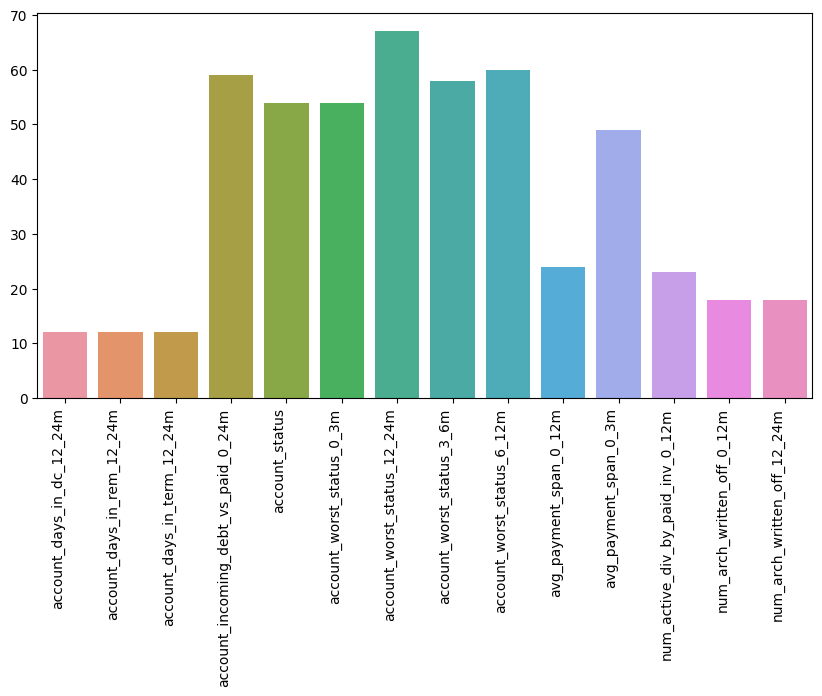

In [20]:
# Explore the dataset, in particular look at the NA counts
has_na = []
for col in df.columns:
    perc_na = 0
    perc_na = round(df[col].isna().sum()/len(df), 2)*100
    if perc_na > 0:
        has_na.append([col, perc_na])


# Plot out the columns with NA (their percentages)
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
na_plot = sns.barplot(x=[n[0] for n in has_na], y=[n[1] for n in has_na],  ax=ax)
na_plot.set_xticklabels(na_plot.get_xticklabels(), rotation=90, horizontalalignment='right');


In [ ]:
# Let's explore some of the columns (other than worst_status_active_inv
# which we already know has a high NA count)

In [21]:
def my_imputer(col, replacement_val, new_dtype = None):
    """
    This method will replace NA values with another value
    and change the column type if required.

    Keeping things simple here and not sending the df

    Parameters:
    -----------
        string, (value to use as replacement), string

    Returns:
    -------
        None
    """

    df[col]=df[col].apply(lambda x: replacement_val if pd.isnull(x) else x)

    if new_dtype != None:
        df.astype({col: 'int32'}).dtypes

In [23]:
# Treat the NA values for the column by replacing them with another value
# then set the column type to another dtype is required

my_imputer('worst_status_active_inv', 0, 'int32')
df['worst_status_active_inv'].isna().sum()

0

### Feature Extraction & Engineering

In [9]:
# to code

### Feature Scaling & Selection

In [10]:
# to code

## Modelling

In [11]:
# to code

## Model Evaluation & Tuning

In [12]:
# to code